In [68]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import LineString
from shapely.geometry import Polygon

In [85]:
startpoint = [-127.4539832,50.7310306]
road_startpoint = [-127.4541603, 50.7254152]
df_houses = pd.DataFrame(columns=['col1','geometry'])
df_lines = pd.DataFrame(columns=['col1','geometry'])
df_connectors = pd.DataFrame(columns=['col1','geometry'])
df_transformers = pd.DataFrame(columns=['col1','geometry'])
df_roads = pd.DataFrame(columns=['col1','geometry'])
Xstep = 1/111000*25/0.636
Ystep_lane = 1/111000*40/0.636
Ystep_block = 1/111000*80/0.636
road_width = 1/111000*10/0.636

        col1                     geometry
0      name1  POINT (-127.45398 50.73103)
1      name2  POINT (-127.45363 50.73103)
2      name3  POINT (-127.45327 50.73103)
3      name4  POINT (-127.45292 50.73103)
4      name5  POINT (-127.45257 50.73103)
..       ...                          ...
197  name198  POINT (-127.44265 50.72706)
198  name199  POINT (-127.44230 50.73046)
199  name199  POINT (-127.44230 50.72876)
200  name199  POINT (-127.44230 50.72706)
201  name199  POINT (-127.45398 50.72593)

[202 rows x 2 columns]


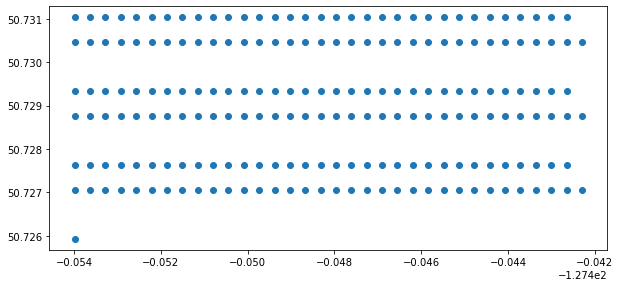

In [70]:
#Houses mapping
for k in range (3):
    Y1 = startpoint[1]-Ystep_lane*k-Ystep_block*k
    for i in range(2):
        Y = Y1-Ystep_lane*i
        for j in range(33):
            X = startpoint[0]+Xstep*j
            newpoint=Point(X,Y)
            coords=(X,Y)      
            df_houses = df_houses.append({'col1':"name{}".format(k*66+i*33+j+1),'geometry': newpoint}, ignore_index=True)

X = startpoint[0]+Xstep*33
Y = startpoint[1]-Ystep_lane
newpoint=Point(X,Y)
df_houses = df_houses.append({'col1':"name199",'geometry': newpoint}, ignore_index=True)

X = startpoint[0]+Xstep*33
Y = startpoint[1]-Ystep_lane*2-Ystep_block
newpoint=Point(X,Y)
df_houses = df_houses.append({'col1':"name199",'geometry': newpoint}, ignore_index=True)

X = startpoint[0]+Xstep*33
Y = startpoint[1]-Ystep_lane*3-Ystep_block*2
newpoint=Point(X,Y)
df_houses = df_houses.append({'col1':"name199",'geometry': newpoint}, ignore_index=True)

X = startpoint[0]
Y = startpoint[1]-Ystep_lane*3-Ystep_block*3
newpoint=Point(X,Y)
df_houses = df_houses.append({'col1':"name199",'geometry': newpoint}, ignore_index=True)
gdf = gpd.GeoDataFrame(df_houses, crs="EPSG:4326")
gdf.plot(figsize=(10,20))
print(df_houses)
gdf.to_file("canada_task_houses.shp")

In [71]:
#roads mapping
point1=road_startpoint
point2=(road_startpoint[0]-road_width,road_startpoint[1])
point3=(road_startpoint[0]-road_width,startpoint[1]-Ystep_lane/2+road_width/2)
point4=(road_startpoint[0],startpoint[1]-Ystep_lane/2+road_width/2)
df_roads=df_roads.append({'col1':"name1",'geometry': Polygon([point1,point2,point3,point4])}, ignore_index=True)
for k in range (3):
    Y_upper=startpoint[1]-Ystep_lane*k-Ystep_block*k-Ystep_lane/2+road_width/2
    point1=(road_startpoint[0],Y_upper)
    point2=(road_startpoint[0],Y_upper-road_width)
    point3=(road_startpoint[0]+Xstep*35,Y_upper-road_width)
    point4=(road_startpoint[0]+Xstep*35,Y_upper)
    df_roads=df_roads.append({'col1':"name2",'geometry': Polygon([point1,point2,point3,point4])}, ignore_index=True)
Y_upper=startpoint[1]-Ystep_lane*3-Ystep_block*3-Ystep_lane/2+road_width/2
point1=(road_startpoint[0],Y_upper)
point2=(road_startpoint[0],Y_upper-road_width)
point3=(road_startpoint[0]+Xstep*2,Y_upper-road_width)
point4=(road_startpoint[0]+Xstep*2,Y_upper)
df_roads=df_roads.append({'col1':"name2",'geometry': Polygon([point1,point2,point3,point4])}, ignore_index=True)
gdf = gpd.GeoDataFrame(df_roads, crs="EPSG:4326")
gdf.to_file("canada_task_roads.shp")

In [72]:
#transformers mapping
trafo_startpoint=(startpoint[0]+Xstep, startpoint[1]-Ystep_lane/2-road_width/2)
for k in range (3):
    Y = trafo_startpoint[1]-Ystep_lane*k-Ystep_block*k
    for j in range(11):
        X = trafo_startpoint[0]+Xstep*3*j
        newpoint=Point(X,Y)
        coords=(X,Y)      
        df_transformers = df_transformers.append({'col1':"name{}".format(k*33+j+1),'geometry': newpoint}, ignore_index=True)
X = startpoint[0]
Y = trafo_startpoint[1]-Ystep_lane*3-Ystep_block*3+road_width
newpoint=Point(X,Y)       
df_transformers = df_transformers.append({'col1':"name34",'geometry': newpoint}, ignore_index=True)
gdf = gpd.GeoDataFrame(df_transformers, crs="EPSG:4326")
gdf.to_file("canada_task_transformers.shp")

In [86]:
#main lines mapping (grid to transformers)
point1=road_startpoint
point2=(road_startpoint[0],startpoint[1]-Ystep_lane/2-road_width/2)
df_lines=df_lines.append({'col1':"name",'geometry': LineString([point1,point2])}, ignore_index=True)
for k in range (3):
    Y=startpoint[1]-Ystep_lane*k-Ystep_block*k-Ystep_lane/2-road_width/2
    point1=(road_startpoint[0],Y)
    point2=(road_startpoint[0]+Xstep*31+Xstep/2,Y)
    df_lines=df_lines.append({'col1':"name",'geometry': LineString([point1,point2])}, ignore_index=True)
Y=startpoint[1]-Ystep_lane*3-Ystep_block*3-Ystep_lane/2+road_width/2
point1=(road_startpoint[0],Y)
point2=(road_startpoint[0]+Xstep/2,Y)
df_lines=df_lines.append({'col1':"name",'geometry': LineString([point1,point2])}, ignore_index=True)
gdf = gpd.GeoDataFrame(df_lines, crs="EPSG:4326")
gdf.to_file("canada_task_lines.shp")

In [74]:
#small lines mapping (transformers to houses)
Ystep_short=Ystep_lane/2-road_width/2
Ystep_long=Ystep_lane/2+road_width/2
for k in range (3):
    Y = trafo_startpoint[1]-Ystep_lane*k-Ystep_block*k
    for j in range(11):
        point0=(trafo_startpoint[0]+Xstep*3*j,Y)
        point1=(point0[0],point0[1]-Ystep_short)
        df_connectors=df_connectors.append({'col1':"name",'geometry': LineString([point0,point1])}, ignore_index=True)
        point2=(point0[0],point0[1]+Ystep_long)
        df_connectors=df_connectors.append({'col1':"name",'geometry': LineString([point0,point2])}, ignore_index=True)
        point3=(point0[0]-Xstep,point0[1])
        point4=(point0[0]-Xstep,point0[1]-Ystep_short)
        df_connectors=df_connectors.append({'col1':"name",'geometry': LineString([point0,point3,point4])}, ignore_index=True)
        point5=(point0[0]-Xstep,point0[1]+Ystep_long)
        df_connectors=df_connectors.append({'col1':"name",'geometry': LineString([point0,point3,point5])}, ignore_index=True)
        point6=(point0[0]+Xstep,point0[1])
        point7=(point0[0]+Xstep,point0[1]-Ystep_short)
        df_connectors=df_connectors.append({'col1':"name",'geometry': LineString([point0,point6,point7])}, ignore_index=True)
        point8=(point0[0]+Xstep,point0[1]+Ystep_long)
        df_connectors=df_connectors.append({'col1':"name",'geometry': LineString([point0,point6,point8])}, ignore_index=True)

Y = trafo_startpoint[1]-Ystep_lane*3-Ystep_block*3+road_width
point0=(startpoint[0],Y)
point1=(startpoint[0],Y+Ystep_short)
df_connectors=df_connectors.append({'col1':"name",'geometry': LineString([point0,point1])}, ignore_index=True)

point0=(trafo_startpoint[0]+Xstep*30,trafo_startpoint[1])
point1=(trafo_startpoint[0]+Xstep*32,trafo_startpoint[1])
point2=(trafo_startpoint[0]+Xstep*32,trafo_startpoint[1]-Ystep_short)
df_connectors=df_connectors.append({'col1':"name",'geometry': LineString([point0,point1, point2])}, ignore_index=True)

point0=(trafo_startpoint[0]+Xstep*30,trafo_startpoint[1]-Ystep_block-Ystep_lane)
point1=(trafo_startpoint[0]+Xstep*32,trafo_startpoint[1]-Ystep_block-Ystep_lane)
point2=(trafo_startpoint[0]+Xstep*32,trafo_startpoint[1]-Ystep_block-Ystep_lane-Ystep_short)
df_connectors=df_connectors.append({'col1':"name",'geometry': LineString([point0,point1, point2])}, ignore_index=True)

point0=(trafo_startpoint[0]+Xstep*30,trafo_startpoint[1]-Ystep_block*2-Ystep_lane*2)
point1=(trafo_startpoint[0]+Xstep*32,trafo_startpoint[1]-Ystep_block*2-Ystep_lane*2)
point2=(trafo_startpoint[0]+Xstep*32,trafo_startpoint[1]-Ystep_block*2-Ystep_lane*2-Ystep_short)
df_connectors=df_connectors.append({'col1':"name",'geometry': LineString([point0,point1, point2])}, ignore_index=True)



gdf = gpd.GeoDataFrame(df_connectors, crs="EPSG:4326")
gdf.to_file("canada_task_connectors.shp")